# <div style="background-color:#333;color:#fff;border-radius:20px;padding:15px;text-align:center;margin:0"> DCA | volve data</div>

it is gonna be the same code , but a reusable one

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.optimize import curve_fit

#### <span style="font-weight:800"> Task 1 | load data </span>
- make a function to load the data given the filepath and return only the column we will use `data/production` columns
- function structure
    - arguments: `filepath to the data` , `name of production column` , `name of the date column` , `name of the well we will use` , `name of the column that have different well names to filter the data with`
    - return: dataframe with only two columns `date` ,`production` 

In [2]:
# function to load the data 
def load_data(filepath , well_names_col ,well_name , prod_col_name , date_col_name):

     df= pd.read_excel(filepath,parse_dates=True)
    
    # filtring to the specific well 
     df = df [ df[well_names_col] == well_name][[date_col_name,prod_col_name]]
   # rename columns 
     df.columns = ["date","production"]
   
    
    # return the dataframe with only the two columns [ data , production ], and they must be with the same name
     return df

In [3]:
# test your function here 
df = load_data("../data/Volve production data.xlsx","NPD_WELL_BORE_NAME","15/9-F-14","BORE_OIL_VOL","DATEPRD")
df.head()

,date,production
4967,2008-02-12,0.0
4968,2008-02-13,0.0
4969,2008-02-14,0.0
4970,2008-02-15,0.0
4971,2008-02-16,0.0


In [4]:
# don't modify this code, just run it
assert len(df.columns) == 2 , "make sure you have only two columns"
assert list(df.columns) == ["date","production"], "make shure you rename the columns to [data] and [production] columns"


<AxesSubplot:xlabel='date'>

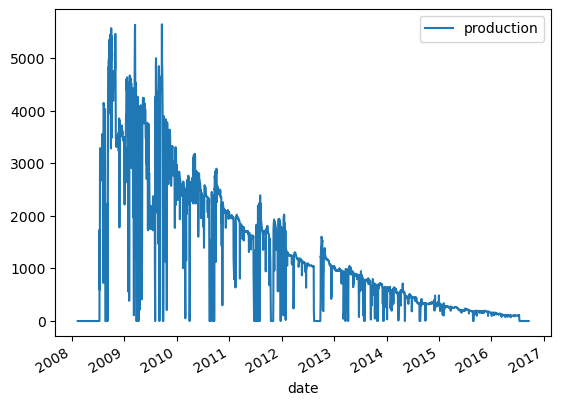

In [5]:
df.plot(x="date",y="production")

In [14]:
# removing the outli
from sklearn.ensemble import IsolationForest # need data frame
from sklearn.neighbors import LocalOutlierFactor # needs data frame

#### <span style="font-weight:800"> Task 2 | remove the outliers </span>
- make a function takes the data and remove the outliers of a given column
- function structure
    - arguments: `df` , `column_name`-> which will be by the defult `production` column
    - return: a new dataframe 

In [6]:
# remove the outliers form the production column
def remove_outliers(df,col_name="production"):
    
    df = df[df[col_name]!=0]
    
    return df

In [7]:
# test the function here
df_removed = remove_outliers(df)
df_removed.head()

,date,production
5118,2008-07-13,1735.26
5119,2008-07-14,592.36
5120,2008-07-15,2532.21
5121,2008-07-16,3030.71
5122,2008-07-17,3288.08


In [8]:
# don't modify this code, just run it
assert len(df_removed) != len(df) , "make sure you removed some outliers"

#### <span style="font-weight:800"> Task 3 | data smoothing </span>
- make a function to smooth a given column using the moving average, and remove the nan values from the data 
- function structure
    - arguments: `df` , `column_name`-> which will be by the defult `production` column , `window_size`
    - return: a new dataframe with three columns , `data` ,`production`,`production_smoothed`

In [9]:
# data smoothing 
def smooth(df,col_name="production", window_size=100):
    
    df[col_name+"_smoothed"] = df[col_name].rolling(window= window_size, center=True).mean()
    # dropping nan valeus
    df= df.dropna()
    
    return df 

In [10]:
# test your code here 
df_smoothed= smooth(df_removed,"production",window_size=100)
df_smoothed

C:\Users\ae504\AppData\Local\Temp\ipykernel_13884\2896281765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name+"_smoothed"] = df[col_name].rolling(window= window_size, center=True).mean()


,date,production,production_smoothed
5179,2008-09-13,4925.62,3809.6498
5180,2008-09-14,4963.82,3829.6124
5181,2008-09-15,4970.38,3858.4468
5182,2008-09-16,4982.77,3867.7339
5183,2008-09-17,5003.65,3872.0095
...,...,...,...
7903,2016-05-21,100.70,103.2273
7904,2016-05-22,101.14,103.3252
7905,2016-05-23,101.57,103.3933
7906,2016-05-24,102.31,103.5048


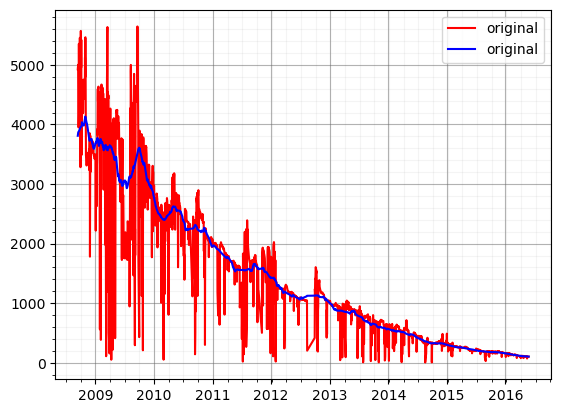

In [11]:
# plotting the data 
plt.plot(df_smoothed["date"],df_smoothed["production"],label="original",color="red")
plt.plot(df_smoothed["date"],df_smoothed["production_smoothed"],label="original",color="blue")
# xlabel 

plt.legend(loc="upper right") 
# major grid lines
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

In [12]:
# don't modify this code, just run it
assert len(df_removed) != len(df_smoothed) , "make sure you removed some outliers"
assert list(df_smoothed.columns) == ["date","production","production_smoothed"], "make sure you have the columns right with the right names"

In [13]:
from arps import arps

In [14]:
params, vis_data = arps(df_smoothed,date_col="date",production_smoothed_col="production_smoothed")

D:\college\student chapter\SPE\Technical manager\python for O&G course\DCA module\arps.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["days"]=  (df[col_name]-df[col_name].min()).dt.days


In [16]:
params

,model,qi,di,b,RMSE
0,exponential,4326.783678,0.000986,0.000000,155.204196
1,harmonic,4901.064453,0.002292,1.000000,389.266554
2,hyperbolic,4072.613254,0.000745,-0.338553,108.953447


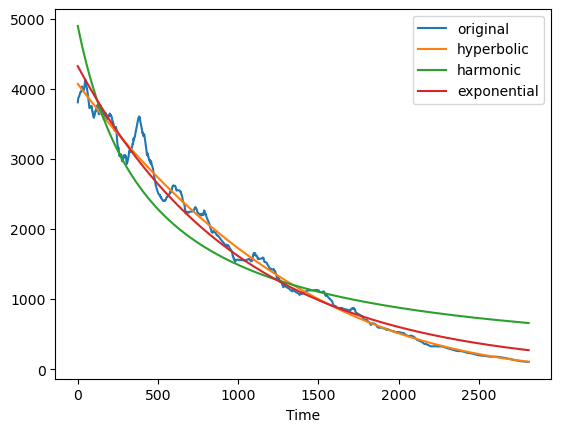

In [18]:
vis_data.plot();

#### <span style="font-weight:800"> Task 4 | getting days from the date </span>
- using the date column, get the days as int values
- function structure
    - arguments: `df` , `column_name`-> which will be by the defult `date` column
    - return: a new dataframe with four columns , `data` ,`production`,`production_smoothed` ,`days`

In [35]:
# get the days as int 
def get_days(df,col_name="date"):
    
    df["days"]=  (df[col_name]-df[col_name].min()).dt.days
    
    return df 

In [38]:
# test the funciton here 
# test your code here 
df_final = get_days(df_smoothed)
df_final


C:\Users\ae504\AppData\Local\Temp\ipykernel_12932\49983159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["days"]=  (df[col_name]-df[col_name].min()).dt.days


,date,production,production_smoothed,days
5179,2008-09-13,4925.62,3809.6498,0
5180,2008-09-14,4963.82,3829.6124,1
5181,2008-09-15,4970.38,3858.4468,2
5182,2008-09-16,4982.77,3867.7339,3
5183,2008-09-17,5003.65,3872.0095,4
...,...,...,...,...
7903,2016-05-21,100.70,103.2273,2807
7904,2016-05-22,101.14,103.3252,2808
7905,2016-05-23,101.57,103.3933,2809
7906,2016-05-24,102.31,103.5048,2810


In [49]:
def hyperbolic(t, qi, di, b):
      return qi / (np.abs((1 + b * di * t))**(1/b))

In [50]:
def exponential(t, qi, di):
        return qi * np.exp(-di * t)

In [51]:
def harmonic(t, qi, di):
        return qi / (1 + di * t)

In [39]:
# getting only the days as T , production_smoothed as Q
T = df_final["days"]
Q=  df_final["production_smoothed"]

#### <span style="font-weight:800"> Task 5 | exponential fitting </span>

In [45]:
# fitting the exponential curve
def exponential_fitting( T , Q):
    """fitting the exponential curve for ARP's model
    parameters
    ----------
    T : the values of the days 
    Q :the values of the production_smoothed column
    
    return:
     dictionary 
     {
         "qi":  the value of qi parameter,
         "di":  the value of the di parameter,
         "b" : 0
     }
     """
    # normalizeing the data 
    T_normalized = T/ max(T)
    Q_normalized = Q/ max(Q)
    
    params , _ = curve_fit(exponential  , T_normalized, Q_normalized)
    qi , di = params
    
    # denormalize the parameters
    qi = qi * max(Q)
    di = di/ max(T)
        
    return { "qi":qi,"di":di, "b":0 }
    

In [46]:
help(exponential_fitting)

Help on function exponential_fitting in module __main__:

exponential_fitting(T, Q)
    fitting the exponential curve for ARP's model
    parameters
    ----------
    T : the values of the days 
    Q :the values of the production_smoothed column
    
    return:
     dictionary 
     {
         "qi":  the value of qi parameter,
         "di":  the value of the di parameter,
         "b" : 0
     }



In [52]:
params = exponential_fitting(T,Q)

In [53]:
params

{'qi': 4326.783677552677, 'di': 0.000986005032051806, 'b': 0}

In [54]:
# show the reult on a plot 
Q_exp = exponential(T , params["qi"] , params["di"])

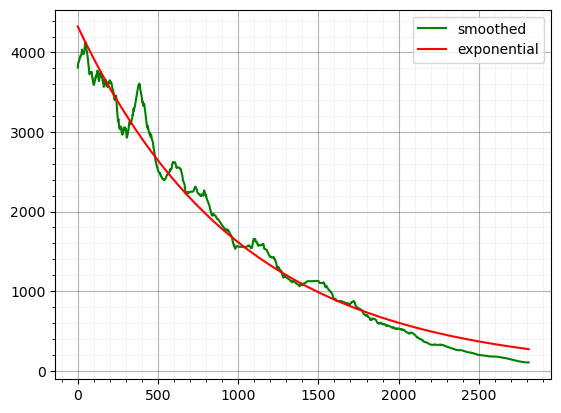

In [55]:
# show effect of smoothing
# plotting the data 
plt.plot(T,Q,label="smoothed",color="green")
plt.plot(T,Q_exp,label="exponential",color="red")

plt.legend() 
# major grid lines
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

##### **Model validity**

In [62]:
def error_function(original_data, model_data):
    n = len(original_data)
    RMSE = np.sqrt(np.sum( (1/n) * np.square(original_data-model_data)))
    return RMSE

In [63]:
RMSE = error_function(Q, Q_exp)
RMSE

155.20419637371882



#### <span style="font-weight:800"> Task 5 | Harmonic fitting </span>

In [64]:
def harmonic_fitting( T , Q):
    """fitting the exponential curve for ARP's model
    parameters
    ----------
    T : the values of the days 
    Q :the values of the production_smoothed column
    
    return:
     dictionary 
     {
         "qi":  the value of qi parameter,
         "di":  the value of the di parameter,
         "b" : 1
     }
     """
    # normalizeing the data 
    T_normalized = T/ max(T)
    Q_normalized = Q/ max(Q)
    
    params , _ = curve_fit(harmonic  , T_normalized, Q_normalized)
    qi , di = params
    
    # denormalize the parameters
    qi = qi * max(Q)
    di = di/ max(T)
        
    return { "qi":qi,"di":di, "b":1 }

In [65]:
params_h = harmonic_fitting(T,Q)

In [66]:
params_h

{'qi': 4901.0644531398075, 'di': 0.00229173289177495, 'b': 1}

In [74]:
Q_h = harmonic(T , params_h["qi"] , params_h["di"])

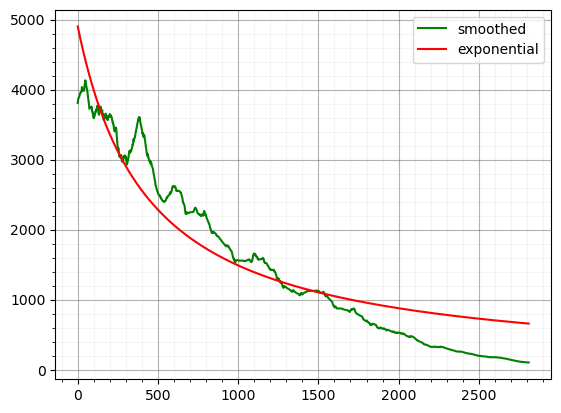

In [75]:
# show effect of smoothing
# plotting the data 
plt.plot(T,Q,label="smoothed",color="green")
plt.plot(T,Q_h,label="exponential",color="red")

plt.legend() 
# major grid lines
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

In [76]:
RMSE_h = error_function(Q, Q_h)
RMSE_h

389.2665540101483

#### <span style="font-weight:800"> Task 5 | hyperbolic fitting </span>

In [71]:
def hyperbolic_fitting( T , Q):
    """fitting the exponential curve for ARP's model
    parameters
    ----------
    T : the values of the days 
    Q :the values of the production_smoothed column
    
    return:
     dictionary 
     {
         "qi":  the value of qi parameter,
         "di":  the value of the di parameter,
         "b" : 1
     }
     """
    # normalizeing the data 
    T_normalized = T/ max(T)
    Q_normalized = Q/ max(Q)
    
    params , _ = curve_fit(hyperbolic  , T_normalized, Q_normalized)
    qi , di ,b = params
    
    # denormalize the parameters
    qi = qi * max(Q)
    di = di/ max(T)
        
    return { "qi":qi,"di":di, "b":b }

In [73]:
params_hy = hyperbolic_fitting(T,Q)
params_hy

{'qi': 4072.613253642711,
 'di': 0.0007447979373347065,
 'b': -0.3385530436211488}

In [78]:
Q_hy = hyperbolic(T , params_hy["qi"] , params_hy["di"],params_hy["b"])

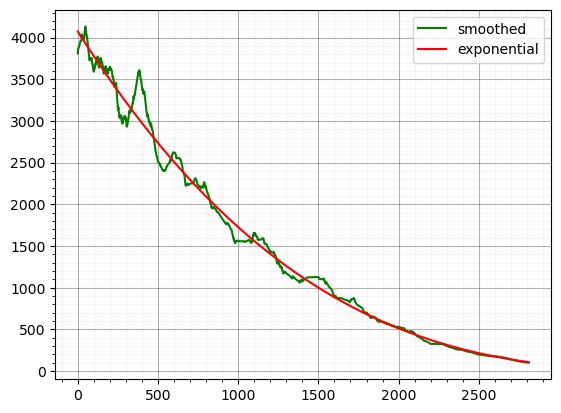

In [79]:
# show effect of smoothing
# plotting the data 
plt.plot(T,Q,label="smoothed",color="green")
plt.plot(T,Q_hy,label="exponential",color="red")

plt.legend() 
# major grid lines
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

In [80]:
RMSE_hy = error_function(Q, Q_hy)
RMSE_hy

108.95344659955798